In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from itertools import chain, combinations
from sklearn.linear_model import LinearRegression

In [2]:
Data=pd.read_csv('Calanus.csv', sep = ';', encoding = 'utf8', dtype=np.float64)#cp1251
Y=Data['Calanus N']

In [3]:
Data.shape

(57, 33)

In [4]:
Data_year=[int(i) for i in Data.year]

In [5]:
mean_Y=np.mean(Y)

In [6]:
Data=Data-Data.mean()#)/Data.std()
Y=Data['Calanus N']

In [7]:
def datanan(Data):
    categ=pd.DataFrame(Data.isna().sum()).sort_values(0)
    Data=Data[categ.index]
    ind=pd.DataFrame(Data.isnull().sum(axis=1).sort_values())
    Data=Data.T[ind.index].T
    return(Data)

In [8]:
categ=pd.DataFrame(Data.isna().sum()).sort_values(0)
Data=Data[categ.index]
ind=pd.DataFrame(Data.isnull().sum(axis=1).sort_values(ascending=False))
Data=Data.T[ind.index].T
#количество столбцов без пропусков 
count_col=pd.DataFrame(categ==0)[0].sum()

In [9]:
#количество строк без пропусков
count_row=pd.DataFrame(ind==0)[0].sum()

In [10]:
Data_small=Data[0:(Data.shape[0]-count_row)].T[0:count_col].T
Data_big=Data[(Data.shape[0]-count_row):]

In [11]:
Data_small

,year,Calanus_85_perc,AOI+1,AOI DJFM,NAO+1,NAO st. based,Calanus_Peak,S_Jun-Aug,t Summer_1,t Summer,Calanus N,Su end,t peak,t_5 C
0,-28.807018,-7.807018,-1.371228,-0.01,-1.217105,0.870614,-0.175439,-0.036842,0.673684,0.868421,48.157895,13.157895,4.210526,-2.982456
53,25.192982,-10.807018,0.658772,1.31,2.107895,2.770614,-5.175439,0.263158,-0.226316,0.468421,-104.842105,-6.842105,4.210526,-12.982456
32,4.192982,-3.807018,1.738772,0.37,1.007895,1.945614,4.824561,-0.536842,0.473684,0.868421,66.157895,-6.842105,14.210526,-12.982456
54,26.192982,-20.807018,1.318772,0.27,2.782895,0.945614,-14.175439,-0.036842,0.673684,2.168421,-33.842105,3.157895,-15.789474,-32.982456
5,-23.807018,30.192982,-0.851228,-1.14,-1.467105,-1.429386,34.824561,-0.436842,-2.626316,-4.131579,-104.842105,-16.842105,4.210526,47.017544
11,-16.807018,-5.807018,0.378772,1.16,0.532895,1.145614,-15.175439,1.163158,0.773684,-0.331579,-81.842105,-16.842105,-5.789474,7.017544
33,5.192982,-5.807018,0.378772,0.85,1.957895,1.570614,-14.175439,-0.536842,-1.726316,-2.831579,179.157895,13.157895,-25.789474,-12.982456
44,16.192982,-9.807018,-0.041228,-0.80,-0.192105,-0.754386,-5.175439,0.663158,-0.126316,0.168421,24.157895,13.157895,34.210526,-2.982456
34,6.192982,9.192982,0.858772,-0.95,1.582895,-2.029386,-12.175439,0.363158,-1.526316,-1.731579,130.157895,3.157895,14.210526,7.017544
36,8.192982,10.192982,0.418772,-0.44,-0.467105,-0.204386,14.824561,0.163158,1.673684,1.468421,-27.842105,-6.842105,-5.789474,7.017544


# по малому куску 

In [12]:
N=57#количество предсказаний 
index_small=Data_small.index
index_small
Data_small.index = range(len(index_small))

In [13]:
x_train_small=Data_small.drop(columns=['Calanus N'])
y_train_small =Data_small['Calanus N']

In [14]:
x_train_small.shape

(29, 13)

In [15]:


#Создаем регрессора как метод, не указываем дополнительные параметры
regressor = LinearRegression()
#Тренеруем модель на тренировочных данных. 
regressor.fit(np.array(x_train_small),y_train_small)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
y_pred = regressor.predict(x_train_small)


In [17]:
r2_score(y_pred,y_train_small)

0.3917867180800183

In [18]:
prediction =[]
for j in range(9,x_train_small.shape[1]):
    for i in combinations(range(x_train_small.shape[1]), j):
        x_pred=x_train_small[x_train_small.columns[list(i)]]
        regressor = LinearRegression()
        regressor.fit(x_pred,y_train_small)
        y_pred = regressor.predict(x_pred)
        prediction.append(y_pred)


In [19]:
r_2=pd.DataFrame([r2_score(prediction[i],y_train_small) for i in range(len(prediction))])

In [20]:
index_r_2=r_2.sort_values(0,ascending=False)[:N].index

In [21]:
prediction=pd.DataFrame(prediction)
prediction_small=prediction.T[index_r_2]

In [22]:
prediction_small.shape

(29, 57)

# по большому куску

In [23]:
N=57#количество предсказаний 
index_big=Data_big.index
index_big
Data_big.index = range(len(index_big))

In [24]:
x_train_big=Data_big.drop(columns=['Calanus N'])
y_train_big =Data_big['Calanus N']

In [25]:


#Создаем регрессора как метод, не указываем дополнительные параметры
regressor = LinearRegression()
#Тренеруем модель на тренировочных данных. 
regressor.fit(x_train_big,y_train_big)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
y_pred = regressor.predict(x_train_big)

In [27]:
x_train_big.shape[1]-1

31

In [28]:
import random
random.sample(list(range(0,x_train_big.shape[1]-1)), 20)

[27, 14, 5, 19, 26, 8, 10, 3, 12, 0, 21, 20, 18, 11, 7, 1, 16, 30, 25, 9]

In [29]:
#если хочу чтобы корреляци <1
prediction =[]

for i in range(100):
    x_pred=x_train_big[x_train_big.columns[random.sample(list(range(0,x_train_big.shape[1]-1)), 25)]]
    regressor = LinearRegression()
    regressor.fit(x_pred,y_train_big)
    y_pred = regressor.predict(x_pred)
    prediction.append(y_pred)

In [30]:
prediction =[]

for i in combinations(range(x_train_big.shape[1]), x_train_big.shape[1]-2):
    x_pred=x_train_big[x_train_big.columns[list(i)]]
    regressor = LinearRegression()
    regressor.fit(x_pred,y_train_big)
    y_pred = regressor.predict(x_pred)
    prediction.append(y_pred)

In [31]:
r_2=pd.DataFrame([r2_score(prediction[i],y_train_big) for i in range(len(prediction))])


In [32]:
index_r_2=r_2.sort_values(0,ascending=False)[:N].index

In [33]:
prediction=pd.DataFrame(prediction)
prediction_big=prediction.T[index_r_2]

# all prediction 

In [34]:
prediction_big.columns=range(57)
prediction_small.columns=range(57)

In [35]:
pred_all=prediction_big.append(prediction_small)


In [36]:
pred_all.index=range(prediction_big.shape[0]+prediction_small.shape[0])

In [37]:
pred_all.T[index_big]=prediction_big.T

In [38]:
pred_all.T[index_small]=prediction_small.T

In [39]:
index_big

Int64Index([52,  4,  3,  9, 10, 51,  2, 12, 13, 14,  7, 45, 17, 18, 42, 22, 25,
            26, 27, 29, 30, 31, 50, 49, 47, 38, 41, 28],
           dtype='int64')

# Частный предикты 

In [40]:
pred_all

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,-41.063550,-43.099533,-44.317007,-43.471490,-39.032074,-33.917074,-34.607892,-42.356654,-40.125848,-40.199737,...,-24.473342,-47.709609,-46.995741,-46.228718,-41.323831,-46.546658,-19.046318,-46.041168,-46.329549,-44.289576
1,-101.682659,-111.010777,-100.663805,-104.182617,-93.122654,-99.953192,-98.034075,-126.858018,-126.893013,-118.444164,...,-104.772385,-135.384260,-110.602744,-135.273534,-107.340840,-108.120651,-104.761964,-129.223652,-128.073978,-111.298404
2,-110.842105,-110.842105,-110.842105,-110.842105,-110.842105,-110.842105,-110.842105,-110.842105,-110.842105,-110.842105,...,-110.842105,-110.842105,-110.842105,-110.842105,-110.842105,-110.842105,-110.842105,-110.842105,-110.842105,-110.842105
3,36.157895,36.157895,36.157895,36.157895,36.157895,36.157895,36.157895,36.157895,36.157895,36.157895,...,36.157895,36.157895,36.157895,36.157895,36.157895,36.157895,36.157895,36.157895,36.157895,36.157895
4,-2.842105,-2.842105,-2.842105,-2.842105,-2.842105,-2.842105,-2.842105,-2.842105,-2.842105,-2.842105,...,-2.842105,-2.842105,-2.842105,-2.842105,-2.842105,-2.842105,-2.842105,-2.842105,-2.842105,-2.842105
5,-80.080602,-79.581459,-79.869273,-79.757572,-80.224168,-80.084622,-80.121061,-76.174115,-76.349880,-76.237484,...,-59.859276,-71.964233,-67.799121,-72.139847,-75.083047,-68.571934,-59.461211,-72.127323,-72.086379,-67.528629
6,-1.049227,-3.032860,-9.933647,-7.259620,-4.406134,6.650631,4.472333,-10.184195,-7.078552,-13.801937,...,-16.726574,-6.274967,-10.497356,-4.390085,7.839283,-11.172501,-9.324084,-8.930715,-10.225181,-8.235039
7,-77.842105,-77.842105,-77.842105,-77.842105,-77.842105,-77.842105,-77.842105,-77.842105,-77.842105,-77.842105,...,-77.842105,-77.842105,-77.842105,-77.842105,-77.842105,-77.842105,-77.842105,-77.842105,-77.842105,-77.842105
8,-66.813764,-73.902862,-71.500046,-72.842779,-68.455688,-70.447362,-70.253599,-74.811317,-77.647857,-76.657974,...,-59.936960,-41.125283,-35.453456,-43.426471,-27.415773,-36.619095,-61.988932,-43.372917,-42.857851,-39.358445
9,-82.842105,-82.842105,-82.842105,-82.842105,-82.842105,-82.842105,-82.842105,-82.842105,-82.842105,-82.842105,...,-82.842105,-82.842105,-82.842105,-82.842105,-82.842105,-82.842105,-82.842105,-82.842105,-82.842105,-82.842105


# Матрица L

In [41]:
pred_all.corr()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,1.000000,0.997058,0.997436,0.996997,0.998171,0.997517,0.997466,0.995041,0.993621,0.993028,...,0.983353,0.978714,0.979648,0.978067,0.981848,0.979373,0.981578,0.977738,0.977817,0.978313
1,0.997058,1.000000,0.999093,0.999606,0.997714,0.998354,0.998304,0.995768,0.997249,0.996404,...,0.981628,0.981508,0.980510,0.982673,0.979397,0.981247,0.982402,0.982367,0.982051,0.981993
2,0.997436,0.999093,1.000000,0.999847,0.999251,0.998206,0.998545,0.994684,0.995699,0.996498,...,0.984416,0.980623,0.981827,0.981490,0.980463,0.982877,0.984466,0.982318,0.982288,0.982858
3,0.996997,0.999606,0.999847,1.000000,0.998809,0.998480,0.998697,0.994894,0.996413,0.996717,...,0.983396,0.980899,0.981293,0.982085,0.979878,0.982388,0.984043,0.982599,0.982438,0.982811
4,0.998171,0.997714,0.999251,0.998809,1.000000,0.998953,0.999293,0.993037,0.993621,0.994827,...,0.985155,0.977791,0.980116,0.978401,0.981190,0.981147,0.985210,0.979500,0.979580,0.980712
5,0.997517,0.998354,0.998206,0.998480,0.998953,1.000000,0.999949,0.992945,0.994520,0.994341,...,0.982447,0.977119,0.977591,0.978368,0.979985,0.978602,0.984022,0.978563,0.978327,0.979137
6,0.997466,0.998304,0.998545,0.998697,0.999293,0.999949,1.000000,0.992783,0.994367,0.994584,...,0.983068,0.977152,0.978062,0.978404,0.980132,0.979192,0.984546,0.978879,0.978697,0.979618
7,0.995041,0.995768,0.994684,0.994894,0.993037,0.992945,0.992783,1.000000,0.999012,0.998019,...,0.985919,0.984800,0.977769,0.984411,0.977099,0.977553,0.984139,0.983817,0.983787,0.977315
8,0.993621,0.997249,0.995699,0.996413,0.993621,0.994520,0.994367,0.999012,1.000000,0.999123,...,0.984850,0.984529,0.977395,0.985384,0.976045,0.977967,0.985112,0.985019,0.984760,0.978812
9,0.993028,0.996404,0.996498,0.996717,0.994827,0.994341,0.994584,0.998019,0.999123,1.000000,...,0.987876,0.983956,0.978189,0.984879,0.976309,0.979334,0.988003,0.985770,0.985740,0.979762


In [42]:
n=57
Corr_57=pred_all.corr()
L=pred_all.corr()
r=(L.sum().sum() -L.shape[0])/L.shape[0]/(L.shape[0]-1)
sigma = np.std([Corr_57[i].drop(i) for i in range(n)])

# Переменные тут

In [43]:
[r,sigma]

[0.9835183995111609, 0.010076723365646573]

# посчитали предикторы 

посчитали корреляционную матрицу ее и r



In [44]:
l_oj=[np.mean(pred_all[i]*Y) for i in range(57)]

In [45]:
#строка f_J*l_0j
fj_loj=pd.DataFrame([pred_all[i]*l_oj[i] for i in range(57)])

In [46]:
Y_pred =fj_loj.mean()

# G

In [47]:

[r,sigma]


[0.9835183995111609, 0.010076723365646573]

In [48]:
import math
def f_k(k):
    return(math.factorial(2*k)/math.factorial(k)/2**k)
def C(n,k):
    return(math.factorial(n)/math.factorial(k)/math.factorial(n-k))

In [49]:
def G_n(n,sigma,r):
    G_sum=0
    for k in range(1,int(n/2)):
        G_sum+= C(n,n-2*k)*(-1)**k*f_k(k)*sigma**(2*k)*(1-r)**(n-2*k)
    return(G_sum)
G_n(n,sigma,r)

-1.2889724007200198e-75

In [50]:
def Theta_me(n,r,sigma):
    det_U_n = (1-r)**(N-1)*(1+(n-1)*r)
    det_L=det_U_n+n*r*G_n(n-1,sigma,r)+G_n(n,sigma,r)
    sum_L_ij=(1-r)**(n-1)+G_n(n-1,sigma,r)
    thet=sum_L_ij/det_L/n
    return(thet)
Theta_me(n,r,sigma)

0.0003192570372113065

In [51]:
y_pred=fj_loj.mean()*Theta_me(n,r,sigma)

In [52]:
index_year=list(pd.DataFrame(Data_year).T[[i for i in range(0,57,4)]].T[0])

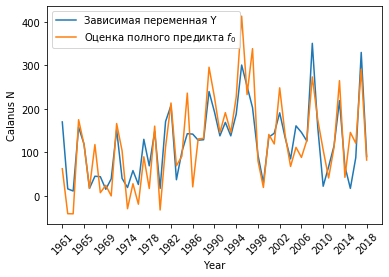

<Figure size 432x288 with 0 Axes>

In [55]:
import matplotlib.pyplot as plt
#plt.title('Зависимость')

plt.xlabel('Year')
plt.ylabel('Calanus N')
plt.plot(Y+mean_Y,label = 'Зависимая переменная Y')

plt.plot(y_pred+mean_Y,label = 'Оценка полного предикта $f_0$')
#  Устанавливаем подписи тиков
#ax.set_xticklabels(['май', 'июнь', 'июль', 'август', 'сентябрь'])
plt.xticks(range(0,57,4), index_year,rotation = 45)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig('CALANUS.png', bbox_inches='tight')

In [54]:
r2_score(y_pred,Y)

0.7240143395480478